# Linear Regression assignment
## Problem Statement

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

The price of cars is required to be modeled with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Import relevant libraries

In [493]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [495]:
%matplotlib inline

## Importing the data

In [496]:
car_prices = pd.read_csv("CarPrice_Assignment.csv")

## Data preparation

### Extract company name from **CarName**

In [497]:
car_prices.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [498]:
car_prices['company'] = car_prices['CarName'].str.split(' ').str[0]

In [499]:
# remove car name and id from the data frame since they are not relevant
car_prices.drop(['car_ID','CarName'], axis=1, inplace=True)
car_prices.rename(columns={'Symboling':'symboling'}, inplace=True)

In [500]:
car_prices['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [501]:
# cleanse the company name, remove duplicates and erroneous mentions
car_prices['company'] = car_prices['company'].str.replace('maxda','mazda')
car_prices['company'] = car_prices['company'].str.replace('Nissan','nissan')
car_prices['company'] = car_prices['company'].str.replace('porcshce','porsche')
car_prices['company'] = car_prices['company'].str.replace('toyouta','toyota')
car_prices['company'] = car_prices['company'].str.replace('vokswagen','volkswagen')
car_prices['company'] = car_prices['company'].str.replace('vw','volkswagen')
car_prices['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [502]:
car_prices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [503]:
car_prices.shape

(205, 25)

In [504]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

In [505]:
car_prices.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data visualization

### Pairwise plotting of variables

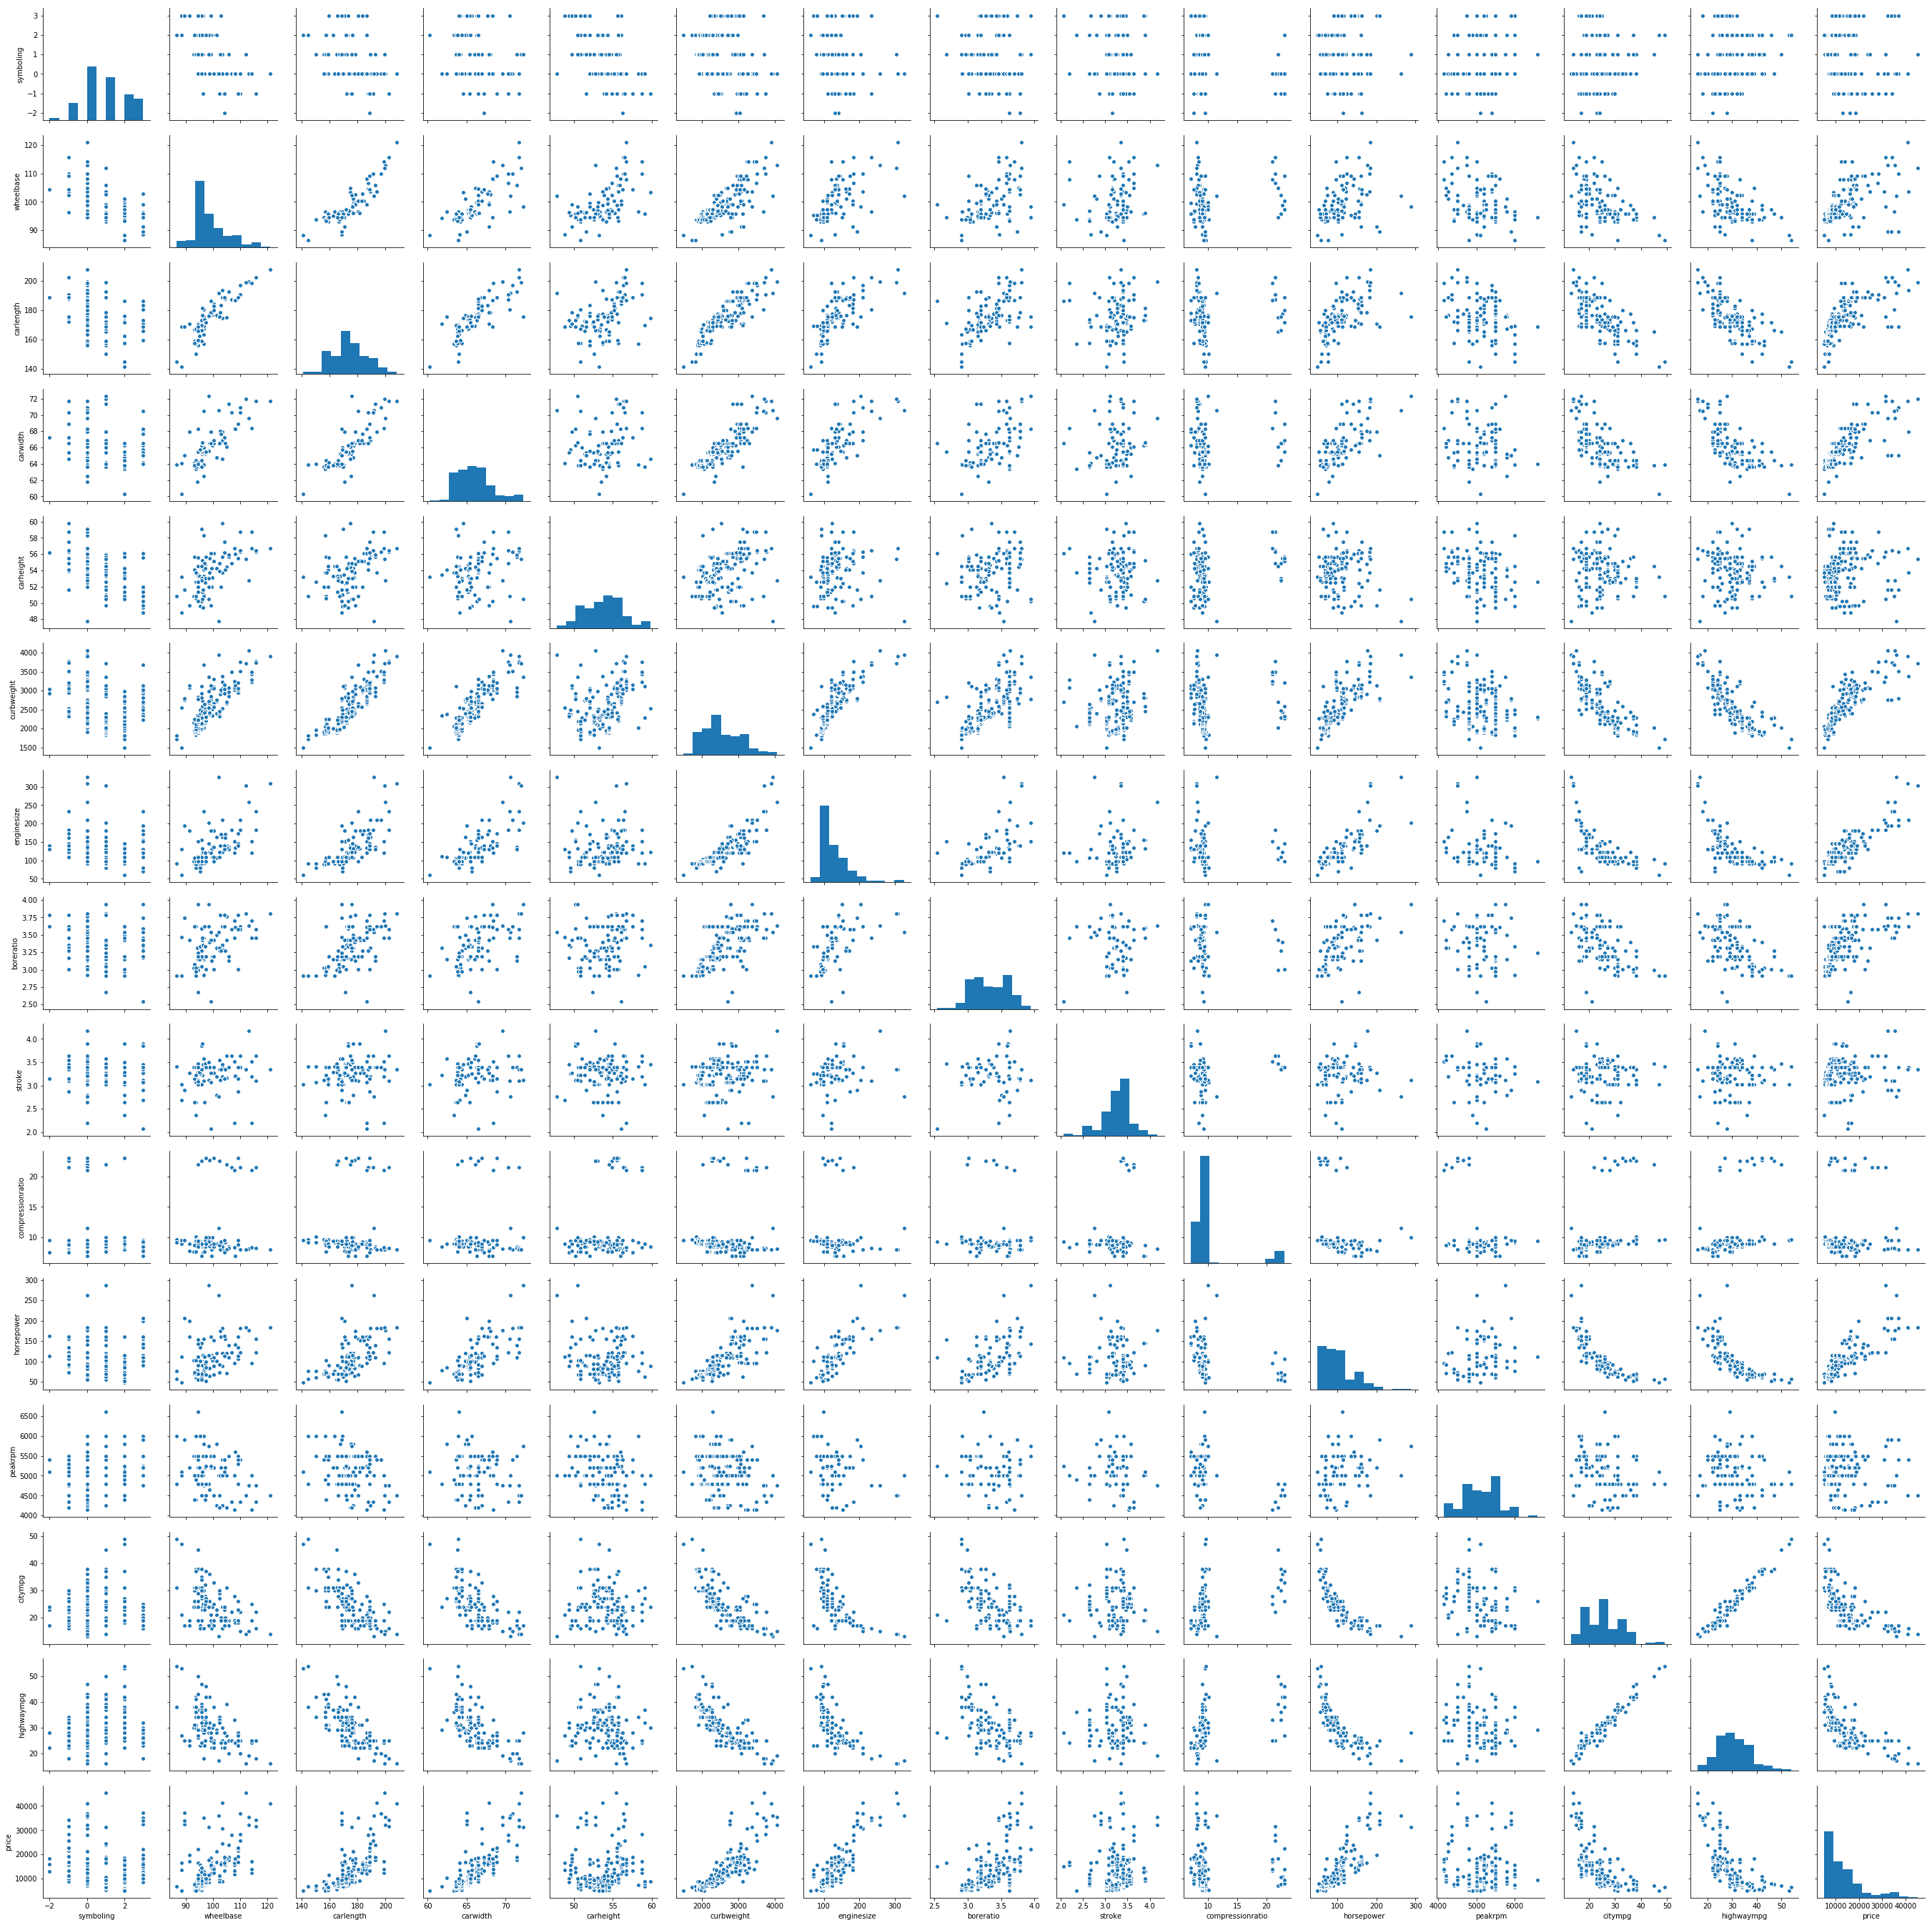

In [506]:
sns.pairplot(car_prices)
plt.show()

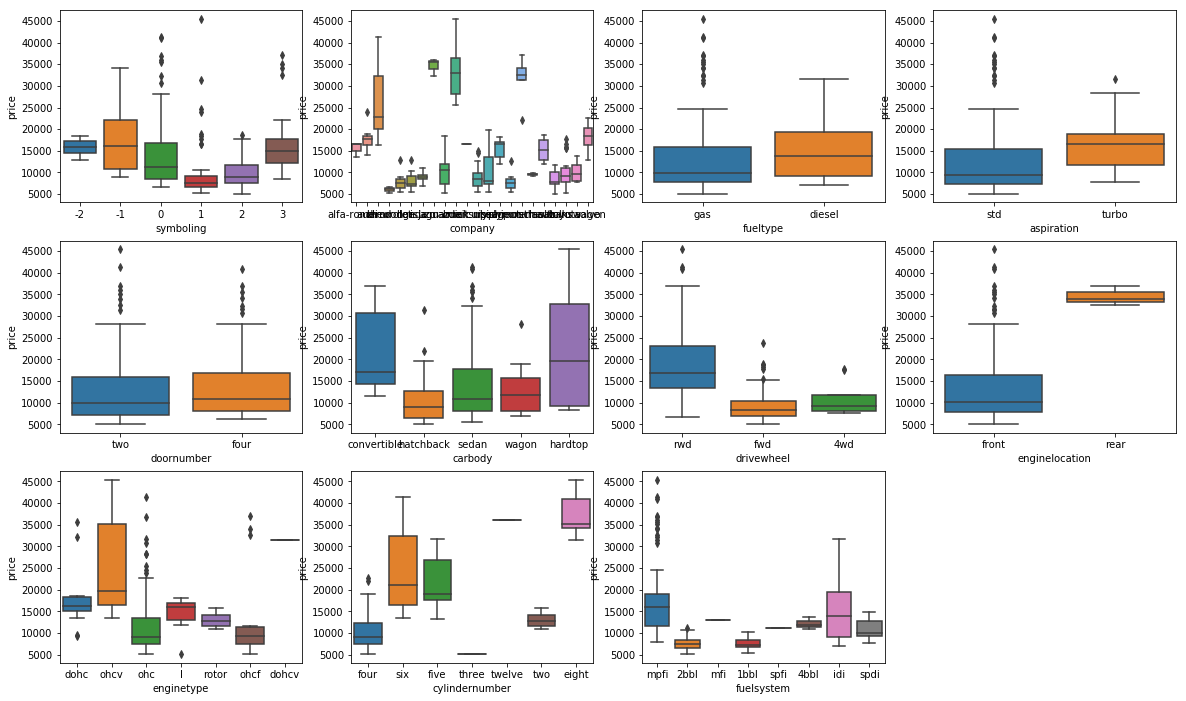

In [507]:
plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_prices)
plt.subplot(3,4,2)
sns.boxplot(x = 'company', y = 'price', data = car_prices)
plt.subplot(3,4,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_prices)
plt.subplot(3,4,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_prices)
plt.subplot(3,4,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_prices)
plt.subplot(3,4,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_prices)
plt.subplot(3,4,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_prices)
plt.subplot(3,4,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_prices)
plt.subplot(3,4,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car_prices)
plt.subplot(3,4,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_prices)
plt.subplot(3,4,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_prices)
plt.show()

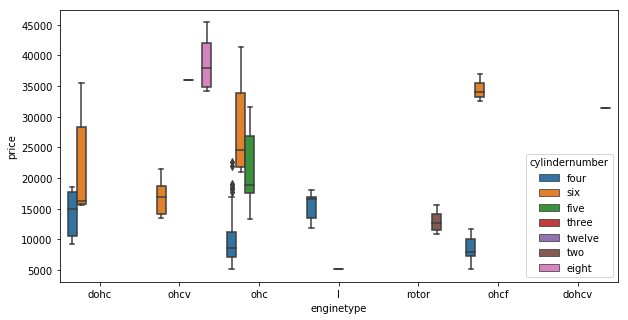

In [508]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'cylindernumber', data = car_prices)
plt.show()

## Dropping redundant variables
- There is a very high correlation between **citympg** and **highwaympg**. We can take average of these 2 and remove the original 2 variables
- **boreratio** and **compressionratio** can be derived from enginesize and stroke thus they are redundant
  - **boreratio** = diameter of piston cylinder / stoke length
  - **compressionratio** = volume when piston is at lowest point (stroke length) / volume when piston is at highest point

In [509]:
car_prices['mpg'] = (car_prices['citympg'] + car_prices['highwaympg'])/2
car_prices.drop(['citympg','highwaympg','boreratio','compressionratio'], axis=1, inplace=True)

## Change categorical variables to numeric representation
### Symboling
Already numerical. No need to create dummy variables 

In [510]:
car_prices['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

### Fuel type

In [511]:
car_prices['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [512]:
# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the housbing list
car_prices['fueltype'] = car_prices[['fueltype']].apply(binary_map)

In [513]:
car_prices['fueltype'].unique()

array([1, 0])

### Aspiration

In [514]:
car_prices['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [515]:
# Defining the map function
def binary_map(x):
    return x.map({'turbo': 1, "std": 0})

# Applying the function to the housbing list
car_prices['aspiration'] = car_prices[['aspiration']].apply(binary_map)

In [516]:
car_prices['aspiration'].unique()

array([0, 1])

### Number of doors

In [517]:
car_prices['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [518]:
# Defining the map function
def binary_map(x):
    return x.map({'two': 0, "four": 1})

# Applying the function to the housbing list
car_prices['doornumber'] = car_prices[['doornumber']].apply(binary_map)

In [519]:
car_prices['doornumber'].unique()

array([0, 1])

### Car body

In [520]:
car_prices['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [521]:
car_bodies = pd.get_dummies(car_prices['carbody'], drop_first = True)
car_bodies = car_bodies.add_prefix('carbody_')
car_prices = pd.concat([car_prices, car_bodies], axis = 1)
car_prices.drop(['carbody'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,horsepower,peakrpm,price,company,mpg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,0,0,rwd,front,88.6,168.8,64.1,48.8,...,2.68,111,5000,13495.0,alfa-romero,24.0,0,0,0,0
1,3,1,0,0,rwd,front,88.6,168.8,64.1,48.8,...,2.68,111,5000,16500.0,alfa-romero,24.0,0,0,0,0
2,1,1,0,0,rwd,front,94.5,171.2,65.5,52.4,...,3.47,154,5000,16500.0,alfa-romero,22.5,0,1,0,0
3,2,1,0,1,fwd,front,99.8,176.6,66.2,54.3,...,3.40,102,5500,13950.0,audi,27.0,0,0,1,0
4,2,1,0,1,4wd,front,99.4,176.6,66.4,54.3,...,3.40,115,5500,17450.0,audi,20.0,0,0,1,0


### Drive wheel

In [522]:
car_prices['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [523]:
drives = pd.get_dummies(car_prices['drivewheel'], drop_first = True)
drives = drives.add_prefix('drivewheel_')
car_prices = pd.concat([car_prices, drives], axis = 1)
car_prices.drop(['drivewheel'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,peakrpm,price,company,mpg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,1,0,0,front,88.6,168.8,64.1,48.8,2548,...,5000,13495.0,alfa-romero,24.0,0,0,0,0,0,1
1,3,1,0,0,front,88.6,168.8,64.1,48.8,2548,...,5000,16500.0,alfa-romero,24.0,0,0,0,0,0,1
2,1,1,0,0,front,94.5,171.2,65.5,52.4,2823,...,5000,16500.0,alfa-romero,22.5,0,1,0,0,0,1
3,2,1,0,1,front,99.8,176.6,66.2,54.3,2337,...,5500,13950.0,audi,27.0,0,0,1,0,1,0
4,2,1,0,1,front,99.4,176.6,66.4,54.3,2824,...,5500,17450.0,audi,20.0,0,0,1,0,0,0


### Engine location

In [524]:
car_prices['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [525]:
# Defining the map function
def binary_map(x):
    return x.map({'front': 0, "rear": 1})

# Applying the function to the housbing list
car_prices['enginelocation'] = car_prices[['enginelocation']].apply(binary_map)

In [526]:
car_prices['enginelocation'].unique()

array([0, 1])

### Engine type

In [527]:
car_prices['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [528]:
engine_types = pd.get_dummies(car_prices['enginetype'], drop_first = True)
engine_types = engine_types.add_prefix('enginetype_')
car_prices = pd.concat([car_prices, engine_types], axis = 1)
car_prices.drop(['enginetype'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


### Number of cylinders

In [529]:
car_prices['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [530]:
cyliners = pd.get_dummies(car_prices['cylindernumber'], drop_first = True)
cyliners = cyliners.add_prefix('cylindernumber_')
car_prices = pd.concat([car_prices, cyliners], axis = 1)
car_prices.drop(['cylindernumber'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0


### Fuel System

In [531]:
car_prices['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [532]:
fuel_systems = pd.get_dummies(car_prices['fuelsystem'], drop_first = True)
fuel_systems = fuel_systems.add_prefix('fuelsystem_')
car_prices = pd.concat([car_prices, fuel_systems], axis = 1)
car_prices.drop(['fuelsystem'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


### Company name

In [533]:
car_prices['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [534]:
companies = pd.get_dummies(car_prices['company'], drop_first = True)
companies = companies.add_prefix('company_')
car_prices = pd.concat([car_prices, companies], axis = 1)
car_prices.drop(['company'], axis=1, inplace=True)
car_prices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [535]:
# final list of variables to be used for modelling
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
stroke                   205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
price                    205 non-null float64
mpg                      205 non-null float64
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
d

## Test-train split

In [536]:
np.random.seed(0)
df_train, df_test = train_test_split(car_prices, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [537]:
scaler = MinMaxScaler()

In [538]:
# Apply scaler() to all the columns except the categorical and dummy variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'horsepower', 'peakrpm', 'price', 'mpg']

In [539]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
122,1,1,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,1,0,0,0,0,0,0,0
125,3,1,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,1,0,0,0,0,0,0
166,1,1,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,0,1


In [540]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation between variables

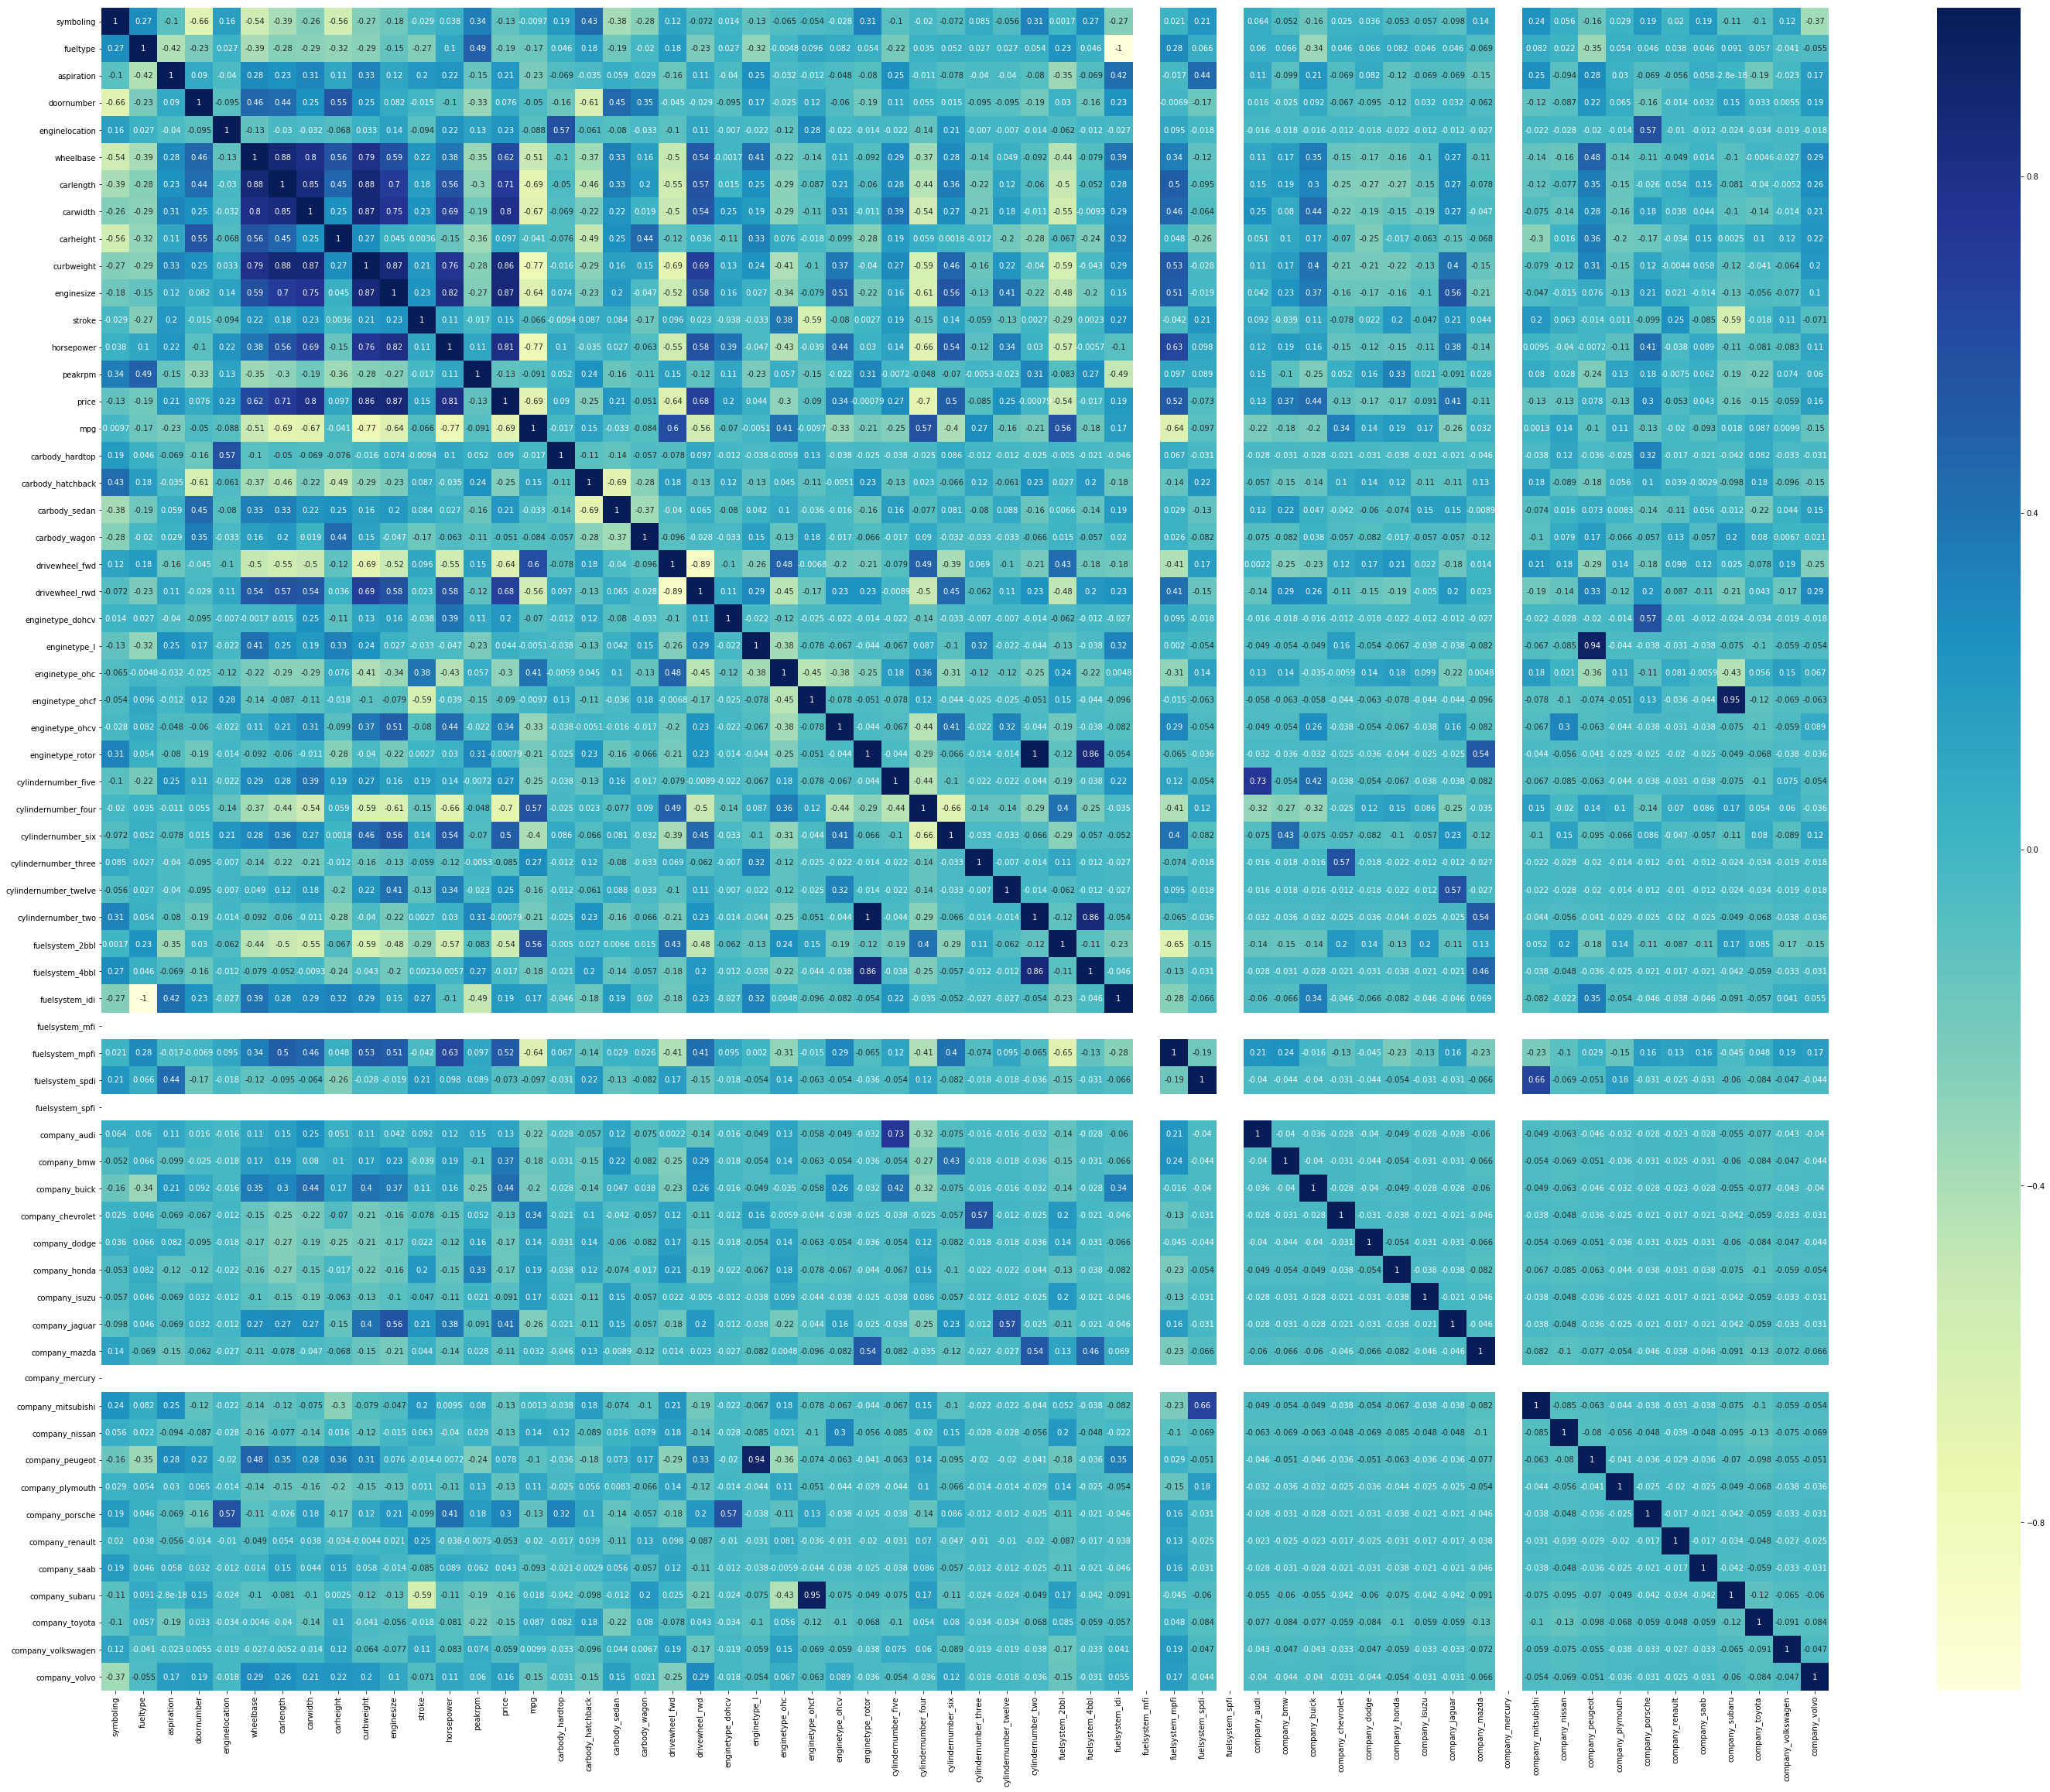

In [541]:
plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [542]:
y_train = df_train.pop('price')
X_train = df_train

## Linear model with 1 variable (engine size)
Engine size has highest correlation with price

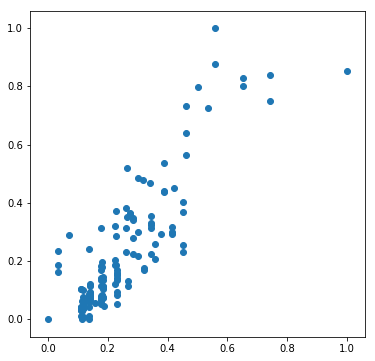

In [543]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, y_train)
plt.show()

In [544]:
X_train_lm = sm.add_constant(X_train[['enginesize']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

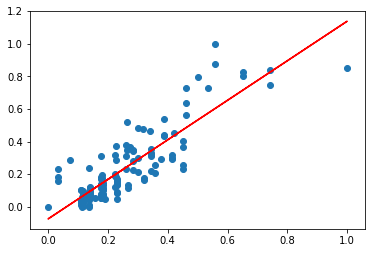

In [545]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [546]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-44
Time:                        23:40:36   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

## Feature selection
### Automatic feature selection using RFE
#### 30 variables

In [547]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe30 = RFE(lm, 30)             # running RFE
rfe30 = rfe30.fit(X_train, y_train)

variables30 = list(zip(X_train.columns,rfe30.support_,rfe30.ranking_))
sorted(variables30, key=lambda x: x[2], reverse=False)

[('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('peakrpm', True, 1),
 ('mpg', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohcf', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('fuelsystem_4bbl', True, 1),
 ('company_bmw', True, 1),
 ('company_chevrolet', True, 1),
 ('company_dodge', True, 1),
 ('company_honda', True, 1),
 ('company_isuzu', True, 1),
 ('company_mazda', True, 1),
 ('company_mitsubishi', True, 1),
 ('company_nissan', True, 1),
 ('company_peugeot', True, 1),
 ('company_plymouth', True, 1),
 ('company_renault', True, 1),
 ('company_subaru', True, 1),
 ('company_toyota', True, 1),
 ('company_volkswagen', True, 1),
 ('company_volvo', False, 2),
 ('aspiration', False, 3),
 ('company_audi', False, 4),
 ('enginetype_ohc', False, 5

In [548]:
col30 = X_train.columns[rfe30.support_]
col30

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'peakrpm', 'mpg', 'enginetype_dohcv',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_4bbl',
       'company_bmw', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_mazda', 'company_mitsubishi',
       'company_nissan', 'company_peugeot', 'company_plymouth',
       'company_renault', 'company_subaru', 'company_toyota',
       'company_volkswagen'],
      dtype='object')

In [549]:
X_train_rfe30 = X_train[col30]
X_train_rfe30 = sm.add_constant(X_train_rfe30)
lm = sm.OLS(y_train,X_train_rfe30).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     83.03
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           3.41e-63
Time:                        23:40:38   Log-Likelihood:                 238.96
No. Observations:                 143   AIC:                            -417.9
Df Residuals:                     113   BIC:                            -329.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

#### 20 variables

In [550]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe20 = RFE(lm, 20)             # running RFE
rfe20 = rfe20.fit(X_train, y_train)

variables20 = list(zip(X_train.columns,rfe20.support_,rfe20.ranking_))
sorted(variables20, key=lambda x: x[2], reverse=False)

[('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('peakrpm', True, 1),
 ('mpg', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohcf', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('company_bmw', True, 1),
 ('company_mitsubishi', True, 1),
 ('company_peugeot', True, 1),
 ('company_renault', True, 1),
 ('company_subaru', True, 1),
 ('fuelsystem_4bbl', False, 2),
 ('company_honda', False, 3),
 ('company_dodge', False, 4),
 ('company_plymouth', False, 5),
 ('company_toyota', False, 6),
 ('company_chevrolet', False, 7),
 ('company_nissan', False, 8),
 ('company_mazda', False, 9),
 ('company_volkswagen', False, 10),
 ('company_isuzu', False, 11),
 ('company_volvo', False, 12),
 ('aspiration', False, 13),
 ('company_audi', False, 14),
 ('enginetype

In [551]:
col20 = X_train.columns[rfe20.support_]
col20

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'peakrpm', 'mpg', 'enginetype_dohcv',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'company_bmw',
       'company_mitsubishi', 'company_peugeot', 'company_renault',
       'company_subaru'],
      dtype='object')

In [552]:
X_train_rfe20 = X_train[col20]
X_train_rfe20 = sm.add_constant(X_train_rfe20)
lm = sm.OLS(y_train,X_train_rfe20).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           3.61e-66
Time:                        23:40:40   Log-Likelihood:                 219.39
No. Observations:                 143   AIC:                            -398.8
Df Residuals:                     123   BIC:                            -339.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

#### 10 variables

In [553]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe10 = RFE(lm, 10)             # running RFE
rfe10 = rfe10.fit(X_train, y_train)

variables10 = list(zip(X_train.columns,rfe10.support_,rfe10.ranking_))
sorted(variables10, key=lambda x: x[2], reverse=False)

[('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('enginetype_ohcf', True, 1),
 ('company_bmw', True, 1),
 ('company_peugeot', True, 1),
 ('company_renault', True, 1),
 ('company_subaru', True, 1),
 ('cylindernumber_six', False, 2),
 ('cylindernumber_twelve', False, 3),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_five', False, 5),
 ('enginetype_dohcv', False, 6),
 ('mpg', False, 7),
 ('peakrpm', False, 8),
 ('company_mitsubishi', False, 9),
 ('carheight', False, 10),
 ('wheelbase', False, 11),
 ('fuelsystem_4bbl', False, 12),
 ('company_honda', False, 13),
 ('company_dodge', False, 14),
 ('company_plymouth', False, 15),
 ('company_toyota', False, 16),
 ('company_chevrolet', False, 17),
 ('company_nissan', False, 18),
 ('company_mazda', False, 19),
 ('company_volkswagen', False, 20),
 ('company_isuzu', False, 21),
 ('company_volvo', False, 22),
 ('aspiration', False, 23),
 ('company_audi', False

In [554]:
col10 = X_train.columns[rfe10.support_]
col10

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'enginetype_ohcf', 'company_bmw', 'company_peugeot', 'company_renault',
       'company_subaru'],
      dtype='object')

In [555]:
X_train_rfe10 = X_train[col10]
X_train_rfe10 = sm.add_constant(X_train_rfe10)
lm = sm.OLS(y_train,X_train_rfe10).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.12e-67
Time:                        23:40:42   Log-Likelihood:                 194.97
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     133   BIC:                            -340.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1599      0.017     

**20 variables gives optimum results**
- Adjusted R-squared = 0.932
- AIC: -398.8
- BIC: -339.5

Using 10 variables changes the BIC to -340.3 which is not significantly different from that of RFE with 20 variables. Also the AIC value is higher -369.9

Also other variables (wheelbase, carheight, peakrpm, mpg) are deemed less significant while using 10 variable

### Manual feature selection after RFE with 20 variables

In [556]:
# remove all company related variables since this parameter will not be relevant to Geely Auto
variables_without_company = [ elem for elem in col20 if not elem.startswith('company_')]
X_train_without_company = X_train[variables_without_company]
X_train_without_company = sm.add_constant(X_train_without_company)
lm = sm.OLS(y_train,X_train_without_company).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     57.39
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           4.51e-49
Time:                        23:40:43   Log-Likelihood:                 163.62
No. Observations:                 143   AIC:                            -295.2
Df Residuals:                     127   BIC:                            -247.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [557]:
vif = pd.DataFrame()
X = X_train_without_company
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,121.82
6,curbweight,14.91
3,carlength,9.67
7,enginesize,9.44
4,carwidth,8.56
2,wheelbase,6.88
13,cylindernumber_four,5.24
14,cylindernumber_six,4.84
9,mpg,4.26
12,cylindernumber_five,2.47


In [558]:
# remove carheight since it has least correlation with price and has a very high p-value
X_train_without_carheight = X_train_without_company.drop(['carheight'], axis=1)
X_train_without_carheight = sm.add_constant(X_train_without_carheight)
lm = sm.OLS(y_train,X_train_without_carheight).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     61.96
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           5.67e-50
Time:                        23:40:44   Log-Likelihood:                 163.61
No. Observations:                 143   AIC:                            -297.2
Df Residuals:                     128   BIC:                            -252.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [559]:
# remove enginetype_dohcv since it has a high p-value.
X_train_without_dohcv = X_train_without_carheight.drop(['enginetype_dohcv'], axis=1)
X_train_without_dohcv = sm.add_constant(X_train_without_dohcv)
lm = sm.OLS(y_train,X_train_without_dohcv).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           6.88e-51
Time:                        23:40:45   Log-Likelihood:                 163.59
No. Observations:                 143   AIC:                            -299.2
Df Residuals:                     129   BIC:                            -257.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [560]:
X_train_without_ohcf = X_train_without_dohcv.drop(['enginetype_ohcf'], axis=1)
X_train_without_ohcf = sm.add_constant(X_train_without_ohcf)
lm = sm.OLS(y_train,X_train_without_ohcf).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     73.27
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           8.62e-52
Time:                        23:40:45   Log-Likelihood:                 163.48
No. Observations:                 143   AIC:                            -301.0
Df Residuals:                     130   BIC:                            -262.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [561]:
X_train_without_carlength = X_train_without_ohcf.drop(['carlength'], axis=1)
X_train_without_carlength = sm.add_constant(X_train_without_carlength)
lm = sm.OLS(y_train,X_train_without_carlength).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     80.38
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.05e-52
Time:                        23:40:46   Log-Likelihood:                 163.36
No. Observations:                 143   AIC:                            -302.7
Df Residuals:                     131   BIC:                            -267.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [562]:
X_train_without_wheelbase = X_train_without_carlength.drop(['wheelbase'], axis=1)
X_train_without_wheelbase = sm.add_constant(X_train_without_wheelbase)
lm = sm.OLS(y_train,X_train_without_wheelbase).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     88.85
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.27e-53
Time:                        23:40:47   Log-Likelihood:                 163.18
No. Observations:                 143   AIC:                            -304.4
Df Residuals:                     132   BIC:                            -271.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [563]:
X_train_without_mpg = X_train_without_wheelbase.drop(['mpg'], axis=1)
X_train_without_mpg = sm.add_constant(X_train_without_mpg)
lm = sm.OLS(y_train,X_train_without_mpg).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     98.90
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.71e-54
Time:                        23:40:47   Log-Likelihood:                 162.83
No. Observations:                 143   AIC:                            -305.7
Df Residuals:                     133   BIC:                            -276.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

After removing **carheight**, **enginetype_dohcv**, **enginetype_ohcf**, **carlength**, **wheelbase** and **mpg** the adjusted r square increases from 0.856 to 0.861. The AIC and BIC values also reduce.
On removing curbweight the adjusted r-square value goes down. Thus freesing on the model.

High VIF value of curbweight can be attributed to the heavy material and bulky size of car.
High VIF value of enginesize is beacuse of its correlation to power and torque attributes which are not being considered in the final model.

In [564]:
vif = pd.DataFrame()
X = X_train_without_mpg
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.84
3,curbweight,7.88
4,enginesize,7.63
2,carwidth,5.52
7,cylindernumber_four,4.26
8,cylindernumber_six,3.99
6,cylindernumber_five,2.10
9,cylindernumber_twelve,1.78
5,peakrpm,1.28
1,enginelocation,1.14


In [565]:
X_train_without_curbweight = X_train_without_mpg.drop(['curbweight'], axis=1)
X_train_without_curbweight = sm.add_constant(X_train_without_curbweight)
lm_curbweight = sm.OLS(y_train,X_train_without_curbweight).fit()
print(lm_curbweight.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     103.7
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.42e-53
Time:                        23:40:49   Log-Likelihood:                 157.98
No. Observations:                 143   AIC:                            -298.0
Df Residuals:                     134   BIC:                            -271.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

# Residual analysis

In [566]:
y_train_price = lm.predict(X_train_without_mpg)

Text(0.5,0,'Errors')

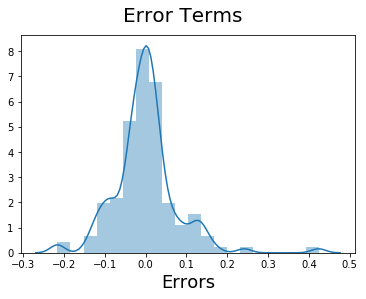

In [567]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making predictions

In [568]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [569]:
X_test.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'stroke', 'horsepower', 'peakrpm', 'mpg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'com

In [570]:
y_test = df_test.pop('price')
X_test = df_test

In [571]:
x_train_without_constant = X_train_without_mpg.columns.drop('const')
X_test_prediction = X_test[x_train_without_constant]
X_test_prediction = sm.add_constant(X_test_prediction)
y_pred = lm.predict(X_test_prediction)

Text(0,0.5,'y_pred')

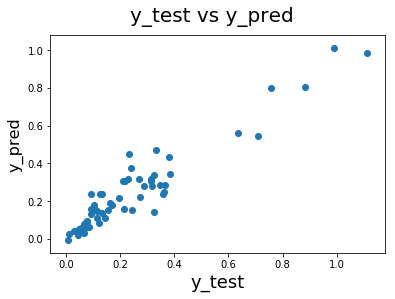

In [572]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [573]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.896822789364171

**The r-squared value is 0.89 which is comfortable high to make a prediction**